# Домашняя работа к уроку 3 "Базы данных"
Нужно придумать небольшую базу данных и написать к ней запросы.
В базе должно быть минимум 4 таблицы и хотя бы две связи вида one-to-many или many-to-many. 
Можно решить как при помощи pandas, так и при помощи SQL.
Запросы должны быть осмысленными и должны решать какую-то задачу.

## Easy
Выгрузить данные и отфильтровать их по какому-то значению.
Пример запроса с БД, приведенной выше: вывести учителей старше 30 лет.

## Normal
Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация
Пример запроса с БД, приведенной выше: найти имя учителя моложе 30 лет, который ведет математику

## Hard
Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. 
Построить графики и сделать выводы.
Пример запроса с БД, приведеной выше: задание 5.

ОТВЕТ НА ДЗ

## Описание базы
Описание: Придумываем небольшую базу. Пусть это будет фирма Березка, у которой 5 офисов, расположенных в разных городах, в каждом из которых трудятся работники - минимум один.
Причем каждый офис оказывает какие-то услуги и в каждом офисе кто-то работает.
Один офис может оказывать несколько услуг и в каждом офисе может работать один или несколько работников.
Один работник может работать только в одном офисе. Каждая услуга может оказываться в каких-то нескольких офисах (в одном или нескольких). Также имеются сведения, что работники были награждены - имеются данные о премировании по работникам в ведомости по премиям.

In [1]:
import pandas as pd
import sqlite3

In [2]:
sql = sqlite3.connect('data/JSC_Berezka.db')

Формируем таблицу с несколькими офисами фирмы, в которых она осуществляет свою деятельность, их названиями и расположением

In [3]:
offices = ["office-North", "office-South", "office-East", "office-West", "office-Central"]
location = ["Murmansk", "Krasnodar", "Moscow", "Kaliningrad", "Moscow"]
offices_df = pd.DataFrame({'office': offices, 'location': location})
offices_df

,office,location
0,office-North,Murmansk
1,office-South,Krasnodar
2,office-East,Moscow
3,office-West,Kaliningrad
4,office-Central,Moscow


Сохраняем эту таблицу в датафрейм, sql, проверяем, что все корректно (через проверочный запрос pd.read_sql):

In [4]:
offices_df.to_sql('offices', sql, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM offices", sql)

,id,office,location
0,0,office-North,Murmansk
1,1,office-South,Krasnodar
2,2,office-East,Moscow
3,3,office-West,Kaliningrad
4,4,office-Central,Moscow


Формируем таблицу с работниками фирмы и описанием каждого работника. Сохраняем таблицу в датафрейм, sql

In [5]:
names = ["Anna", "Alex", "Catherine", "Mary", "Tina", "Valeria", "Viktor", "Peter"]
age = [25, 26, 35, 34, 28, 40, 33, 52]
sex = ["female","male","female","female","female","female","male", "male"]
position = ["junior_manager", "junior_manager", "senior_manager", "director", "assistant", 
            "senior_manager", "assistant", "senior_manager"]    # должность
salary = [50000, 58000, 45000, 120000, 25000, 68000, 35000, 49000]    # в этой базе salary - оклад, а не зарплата'
education = ["data_science", "economics", "IT", "economics", "economics", "PR", "IT", "PR"]
office_id = [1, 0, 2, 4, 3, 4, 3, 3]   # офис работы каждого сотрудника
workers_df = pd.DataFrame({'name': names, 'age': age, 'sex': sex, 'position': position, 
                           'salary': salary, 'education': education,
                           'office_id':office_id})
workers_df

,name,age,sex,position,salary,education,office_id
0,Anna,25,female,junior_manager,50000,data_science,1
1,Alex,26,male,junior_manager,58000,economics,0
2,Catherine,35,female,senior_manager,45000,IT,2
3,Mary,34,female,director,120000,economics,4
4,Tina,28,female,assistant,25000,economics,3
5,Valeria,40,female,senior_manager,68000,PR,4
6,Viktor,33,male,assistant,35000,IT,3
7,Peter,52,male,senior_manager,49000,PR,3


Сохраняем таблицу в датафрейм, проверяем корректность:

In [6]:
workers_df.to_sql('workers', sql, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM workers", sql)

,id,name,age,sex,position,salary,education,office_id
0,0,Anna,25,female,junior_manager,50000,data_science,1
1,1,Alex,26,male,junior_manager,58000,economics,0
2,2,Catherine,35,female,senior_manager,45000,IT,2
3,3,Mary,34,female,director,120000,economics,4
4,4,Tina,28,female,assistant,25000,economics,3
5,5,Valeria,40,female,senior_manager,68000,PR,4
6,6,Viktor,33,male,assistant,35000,IT,3
7,7,Peter,52,male,senior_manager,49000,PR,3


Формируем таблицу с оказываемыми фирмой в целом услугами и ценой каждой единицы услуги, сохраняем в таблицу

In [7]:
services = ["consulting", "report generation", "formation of the plan", "model development", "tax consultation"]
profit_per_service = [100, 500, 250, 120, 400]
services_df = pd.DataFrame({'services': services, 'profit_per_service': profit_per_service})
services_df

,services,profit_per_service
0,consulting,100
1,report generation,500
2,formation of the plan,250
3,model development,120
4,tax consultation,400


In [8]:
services_df.to_sql('services', sql, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM services", sql)

,id,services,profit_per_service
0,0,consulting,100
1,1,report generation,500
2,2,formation of the plan,250
3,3,model development,120
4,4,tax consultation,400


Сопоставим id офисов с оказываемыми каждым офисом услугами (т.е. какие услуги в каком офисе оказываются). Отражено в таблице "Услуги (оказываемые) в офисах" (services_to_offices)

In [9]:
service_id = [0, 1, 3, 3, 4, 0, 1, 2, 2, 2]
offices_id = [0, 0, 1, 2, 3, 3, 4, 4, 1, 3]

services_to_offices_df = pd.DataFrame({'service_id': service_id, 'offices_id': offices_id})
services_to_offices_df

,service_id,offices_id
0,0,0
1,1,0
2,3,1
3,3,2
4,4,3
5,0,3
6,1,4
7,2,4
8,2,1
9,2,3


Сохраним таблицу в sql, проверим корректность

In [10]:
services_to_offices_df.to_sql("services_to_offices", sql, index_label="id", if_exists="replace")

In [11]:
pd.read_sql("SELECT * FROM services_to_offices", sql)

,id,service_id,offices_id
0,0,0,0
1,1,1,0
2,2,3,1
3,3,3,2
4,4,4,3
5,5,0,3
6,6,1,4
7,7,2,4
8,8,2,1
9,9,2,3


Также у нас есть таблица наград работников (ведомость премирования) - сопоставлены id работников и суммы выплаченных премий

In [12]:
id_best = [7, 6, 5, 4, 3, 2, 1, 0]
bonus = [150000, 130000, 41000, 28000, 65000, 69000, 48000, 2000]
bonus_df = pd.DataFrame({'id_best': id_best, 'bonus': bonus})
bonus_df

,id_best,bonus
0,7,150000
1,6,130000
2,5,41000
3,4,28000
4,3,65000
5,2,69000
6,1,48000
7,0,2000


In [13]:
bonus_df.to_sql("bonus", sql, index_label="id", if_exists="replace")

In [14]:
pd.read_sql("SELECT * FROM bonus", sql)  # смотрим, корректно ли записалась таблица

,id,id_best,bonus
0,0,7,150000
1,1,6,130000
2,2,5,41000
3,3,4,28000
4,4,3,65000
5,5,2,69000
6,6,1,48000
7,7,0,2000


# Для задачи EASY 
приведены различные простые варианты запросов к выгружаемым данным, отфильтрованные по какому-то значению

Выведем, например, всех работников фирмы женского пола, у которых оклад в месяц больше 40000.
Выгружать будем из таблицы workers

In [15]:
pd.read_sql("SELECT name, sex, salary FROM workers WHERE sex = 'female' AND salary > 40000", sql)

,name,sex,salary
0,Anna,female,50000
1,Catherine,female,45000
2,Mary,female,120000
3,Valeria,female,68000


Выведем всех работников фирмы мужского пола, у которых оклад в месяц больше 40000. Выгружать будем из таблицы workers

In [16]:
pd.read_sql("SELECT name, sex, salary FROM workers WHERE sex = 'male' AND salary > 40000", sql)

,name,sex,salary
0,Alex,male,58000
1,Peter,male,49000


Выведем всех работников с экономическим образованием, у которых зарплата больше 50000:

In [17]:
pd.read_sql("""SELECT id, name, education, salary 
            FROM workers WHERE education = 'economics' AND salary > 50000""", sql)

,id,name,education,salary
0,1,Alex,economics,58000
1,3,Mary,economics,120000


Выведем всех работников, у которых зарплата больше 40 000 и с должностью senior_manager или assistant

In [18]:
pd.read_sql("""SELECT id, name, position, salary FROM workers WHERE salary > 40000 
AND (position = 'senior_manager' OR position = 'assistant')""", sql)

,id,name,position,salary
0,2,Catherine,senior_manager,45000
1,5,Valeria,senior_manager,68000
2,7,Peter,senior_manager,49000


Выведем всех работников, у которых зарплата больше 33 000, женского пола, старше 25 лет и с должностью senior_manager

In [19]:
pd.read_sql("""SELECT id, name, age, sex, position, salary FROM workers 
WHERE salary > 30000 AND sex = 'female' AND position = 'senior_manager' AND age > 25""", sql)

,id,name,age,sex,position,salary
0,2,Catherine,35,female,senior_manager,45000
1,5,Valeria,40,female,senior_manager,68000


Выведем все офисы, расположенные в Краснодаре

In [20]:
pd.read_sql("""SELECT id, office, location FROM offices 
WHERE location = 'Krasnodar'""", sql)

,id,office,location
0,1,office-South,Krasnodar


и в Москве

In [21]:
pd.read_sql("""SELECT id, office, location FROM offices 
WHERE location = 'Moscow'""", sql)

,id,office,location
0,2,office-East,Moscow
1,4,office-Central,Moscow


Найдем услугу с максимальной стоимостью за единицу

In [22]:
pd.read_sql("""SELECT id, services, profit_per_service, MAX(profit_per_service) 
FROM services 
 """, sql)

,id,services,profit_per_service,MAX(profit_per_service)
0,1,report generation,500,500


Найдем среднюю стоимость единицы услуги (по всем услугам оказываемым фирмой)

In [23]:
pd.read_sql("""SELECT AVG(profit_per_service) as AVG_profit
FROM services """, sql)

,AVG_profit
0,274.0


# Для задач Normal и Hard

Объединим таблицы и отфильтруем их

Изучим информацию о работниках и офисах, с учетом распределения по ним рабочей силы и доходов работников (оклад, премия, совокупный доход).

Вариант 1 - для задачи Normal - нас интересуют молодые работники (до 40 лет) конкретного офиса - office-West.
Объединим сведения из таблиц о работниках и офисах с учетом возраста работников и наименования офиса (тех работников, чей возраст меньше 40 и кто в то же время работает в office-West), а также добавим колонку с совокупным доходом (оклад + бонус).
Узнаем подробную информацию о молодых работниках, которые трудятся в office-West - их возрасте, должности, образовании, совокупных доходах

In [24]:
df_worker_location_YOUNG = pd.read_sql(
    """
    SELECT w.name as worker_name,
    w.id as worker_id,
    w.age as age,
    w.position as worker_position,
    w.education as education,
    o.id as office_id,
    o.office as office,
    o.location as location_office,
    w.salary as worker_salary,
    b.bonus as bonus,
    w.salary + b.bonus as total_income
    FROM workers as w
    JOIN offices as o ON o.id = w.office_id
    JOIN bonus as b ON b.id_best = w.id
    WHERE w.age < 40 AND o.office = 'office-West'
    GROUP BY worker_id
    """, sql)
df_worker_location_YOUNG

,worker_name,worker_id,age,worker_position,education,office_id,office,location_office,worker_salary,bonus,total_income
0,Tina,4,28,assistant,economics,3,office-West,Kaliningrad,25000,28000,53000
1,Viktor,6,33,assistant,IT,3,office-West,Kaliningrad,35000,130000,165000


In [25]:
df_worker_location_YOUNG.to_sql("worker_location_YOUNG", sql, index_label="id", if_exists="replace") # запишем в таблицу

In [26]:
pd.read_sql("""SELECT AVG(worker_salary) as AVG_worker_salary_per_worker,
AVG(bonus) as AVG_bonus_per_worker,
AVG(total_income) as AVG_total_income_per_worker
FROM worker_location_YOUNG """, sql)

,AVG_worker_salary_per_worker,AVG_bonus_per_worker,AVG_total_income_per_worker
0,30000.0,79000.0,109000.0


In [27]:
pd.read_sql("""SELECT MAX(worker_salary) as MAX_worker_salary_per_worker,
MAX(bonus) as MAX_bonus_per_worker,
MAX(total_income) as MAX_total_income_per_worker
FROM worker_location_YOUNG """, sql)

,MAX_worker_salary_per_worker,MAX_bonus_per_worker,MAX_total_income_per_worker
0,35000,130000,165000


Вывод: в office-West трудятся 2 работника младше 40 лет, причем средний их доход на душу по office-West составляет 109 000, премия - 79000, а оклад - 30 000. Максимальный оклад молодого работника в office-West - 35 000, премия - 130 000, доход - 165 000 - то есть молодым работником с самым высоким доходом является Виктор.

Вариант 2 запроса к таблицам базы - для задачи Hard - 
Для начала объединим таблицы о работникаx и офисах, чтобы узнать названия офисов в которых они (конкретные работники) работают и их расположение и разместим информацию в алфавитном порядке по именам работников, а также учтем полученные ими бонусы и рассчитаем общий доход каждого работника в новой колонке и превышение совокупного дохода над окладом работников.
Т.е. цель запроса - получить в одной таблице информацию о работниках, офисе работы и его расположении, а также совокупном доходе каждого работника.
Эта таблица потребуется нам для дальнейшей аналитики при анализе распределения средних доходов работников на душу в разрезе по офисам фирмыб а также по работникам (см. далее)

In [28]:
df_worker_location = pd.read_sql(
    """
    SELECT w.name as worker_name,
    w.id as worker_id,
    w.age as age,
    o.id as office_id,
    o.office as office,
    o.location as location_office,
    w.salary as worker_salary,
    b.bonus as bonus,
    w.salary+b.bonus as total_income,
    ((w.salary+b.bonus)/w.salary) as total_income_to_salary
    FROM workers as w
    JOIN offices as o ON o.id = w.office_id
    JOIN bonus as b ON b.id_best = w.id
    ORDER BY worker_name
       """, sql)
df_worker_location

,worker_name,worker_id,age,office_id,office,location_office,worker_salary,bonus,total_income,total_income_to_salary
0,Alex,1,26,0,office-North,Murmansk,58000,48000,106000,1
1,Anna,0,25,1,office-South,Krasnodar,50000,2000,52000,1
2,Catherine,2,35,2,office-East,Moscow,45000,69000,114000,2
3,Mary,3,34,4,office-Central,Moscow,120000,65000,185000,1
4,Peter,7,52,3,office-West,Kaliningrad,49000,150000,199000,4
5,Tina,4,28,3,office-West,Kaliningrad,25000,28000,53000,2
6,Valeria,5,40,4,office-Central,Moscow,68000,41000,109000,1
7,Viktor,6,33,3,office-West,Kaliningrad,35000,130000,165000,4


In [29]:
ti = df_worker_location.total_income.sum()
ws = df_worker_location.worker_salary.sum()
bo = df_worker_location.bonus.sum()
bo_to_ti = round(bo/ti*100, 2)
ws_to_ti = round(ws/ti*100, 2)
print('В целом по фирме совокупный доход всех работников составил', ti, 'рублей. В том числе по окладам =', ws, ', по премиям', bo)
print('В структуре совокупного дохода преобладают премии - ', bo_to_ti, 'процентов от всех доходов работников в целом.')
print('На долю премий приходится', ws_to_ti, 'процентов от всех доходов.')

В целом по фирме совокупный доход всех работников составил 983000 рублей. В том числе по окладам = 450000 , по премиям 533000
В структуре совокупного дохода преобладают премии -  54.22 процентов от всех доходов работников в целом.
На долю премий приходится 45.78 процентов от всех доходов.


Распределение совокупного дохода каждого из работников в структуре их доходов в целом по фирме - на диаграмме.

<AxesSubplot:ylabel='total_income'>

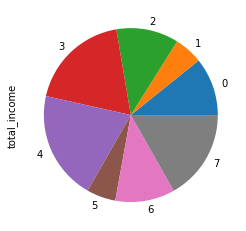

In [30]:
df_worker_location.total_income.plot(kind = "pie")

Махимальный совокупный доход - у Петера, минимальный - у Анны

<AxesSubplot:ylabel='worker_salary'>

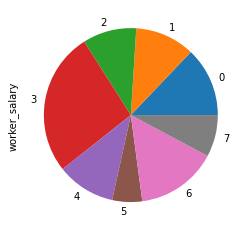

In [31]:
df_worker_location.worker_salary.plot(kind = "pie")

При этом максимальный оклад - у Mary, а минимальный - у Тины

<AxesSubplot:ylabel='bonus'>

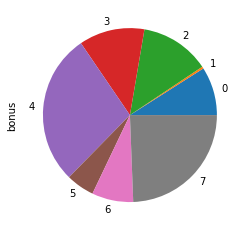

In [32]:
df_worker_location.bonus.plot(kind = "pie")

Самую большую премию получил Петер, самую маленькую - Анна.

Можем удалить столбцы, которые не требуются для дальнейшей аналитики по совокупному доходу работников на душу и среднем возрасте работников в разрезе по офисам.

In [33]:
df_worker_location.drop(['worker_id', 'office_id', 'total_income_to_salary'], axis = 1, inplace = True)

In [34]:
df_worker_location.to_sql("worker_location", sql, index_label="id", if_exists="replace")

Посмотрим распределение работников по возрастам 

<AxesSubplot:>

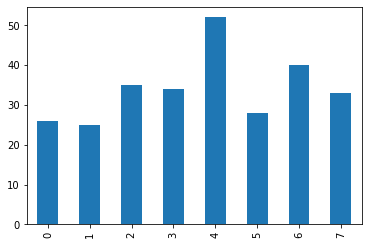

In [35]:
df_worker_location.age.plot.bar(y=['age'], x='worker_name')

Определим средний возраст и средние доходы на душу работника в целом по компании независимо от офиса работы/
Данные отражены в сформированном датафрейме по запросу:

In [36]:
df_worker_AVG = pd.read_sql(
    """
    SELECT AVG(w.age) as AVG_age,
    AVG(w.worker_salary) as AVG_worker_salary,
    AVG(w.bonus) as AVG_bonus,
    AVG(w.worker_salary+w.bonus) as AVG_total_income
    FROM worker_location as w
           """, sql)
df_worker_AVG

,AVG_age,AVG_worker_salary,AVG_bonus,AVG_total_income
0,34.125,56250.0,66625.0,122875.0


In [37]:
AVG_age = int(df_worker_AVG.AVG_age)
AVG_worker_salary = int(df_worker_AVG.AVG_worker_salary)
AVG_bonus = int(df_worker_AVG.AVG_bonus)
AVG_total_income = int(df_worker_AVG.AVG_total_income)
print('Средний возраст работников фирмы, лет', AVG_age)
print('Средний оклад работников фирмы, руб', AVG_worker_salary)
print('Средняя премия работников фирмы, руб', AVG_bonus)
print('Средний совокупный доход работников фирмы, руб', AVG_total_income)

Средний возраст работников фирмы, лет 34
Средний оклад работников фирмы, руб 56250
Средняя премия работников фирмы, руб 66625
Средний совокупный доход работников фирмы, руб 122875


In [38]:
older_AVG = df_worker_location[df_worker_location.age >= AVG_age].worker_name.count()
older_AVG_part = older_AVG/df_worker_location.worker_name.count()*100
younger_AVG = df_worker_location[df_worker_location.age < AVG_age].worker_name.count()
younger_AVG_part = younger_AVG/df_worker_location.worker_name.count()*100
print('Число работников фирмы старше (или равно) среднего возраста = ', older_AVG, "или", older_AVG_part, "% общего числа")
print('Число работников фирмы младше среднего возраста = ', younger_AVG, "или", younger_AVG_part, "% общего числа" )

Число работников фирмы старше (или равно) среднего возраста =  4 или 50.0 % общего числа
Число работников фирмы младше среднего возраста =  4 или 50.0 % общего числа


Как видим, средний оклад работников на душу - 56250, премия - 66625, а доход - 122875 руб, при том что средний возраст персонала = 34 года.
Причем из числа всех работников - только у 3x человек совокупный доход составляет более среднего (или равно) - 122875 руб., о чем свидетельствует приведенный ниже запрос (совокупный доход наиболее богатых работников расположен в порядке возрастания):

In [39]:
df_worker_location_AVG_total_income = pd.read_sql(
    """
    SELECT w.worker_name as worker_name,
    w.age as age,
    w.office as office,
    w.worker_salary as worker_salary,
    w.bonus as bonus,
    w.worker_salary+w.bonus as total_income
    FROM worker_location as w
    WHERE total_income >= 122875
    ORDER BY total_income
       """, sql)
df_worker_location_AVG_total_income

,worker_name,age,office,worker_salary,bonus,total_income
0,Viktor,33,office-West,35000,130000,165000
1,Mary,34,office-Central,120000,65000,185000
2,Peter,52,office-West,49000,150000,199000


In [40]:
rich = df_worker_location[df_worker_location.total_income >= AVG_total_income].worker_name.count()/workers_df.name.count()*100
print('На работников с доходом выше среднего приходится', rich, 'процентов работников от общего числа сотрудников фирмы')

На работников с доходом выше среднего приходится 37.5 процентов работников от общего числа сотрудников фирмы


In [41]:
rich_2 = df_worker_location_AVG_total_income.worker_name.count()  # число работников с высоким общим доходом
print('Число работников с совокупным доходом выше среднего составляет всего',rich_2,'человека')
print('У остальных работников фирмы доход ниже среднего')

Число работников с совокупным доходом выше среднего составляет всего 3 человека
У остальных работников фирмы доход ниже среднего


Найдем средний оклад работников на душу и средний совокупный доход работника на душу в разрезе по офисам 
и средний возраст работников в разрезе по каждому офису, на основании полученных в результате выполнения запроса данных.

In [42]:
df_worker_location_mean = df_worker_location.groupby(['office']).mean().round(0)
df_worker_location_mean

,age,worker_salary,bonus,total_income
office,,,,
office-Central,37.0,94000.0,53000.0,147000.0
office-East,35.0,45000.0,69000.0,114000.0
office-North,26.0,58000.0,48000.0,106000.0
office-South,25.0,50000.0,2000.0,52000.0
office-West,38.0,36333.0,102667.0,139000.0


In [43]:
df_worker_location_mean.to_sql("worker_location_mean", sql, index_label="id", if_exists="replace") # запишем результат в sql
pd.read_sql("SELECT * FROM worker_location_mean", sql)

,id,age,worker_salary,bonus,total_income
0,office-Central,37.0,94000.0,53000.0,147000.0
1,office-East,35.0,45000.0,69000.0,114000.0
2,office-North,26.0,58000.0,48000.0,106000.0
3,office-South,25.0,50000.0,2000.0,52000.0
4,office-West,38.0,36333.0,102667.0,139000.0


Также можем определить совокупный доход работников (не на душу) в целом по каждому офису:

In [44]:
df_worker_location_sum = df_worker_location.groupby(['office']).sum().round(0)
df_worker_location_sum

,age,worker_salary,bonus,total_income
office,,,,
office-Central,74,188000,106000,294000
office-East,35,45000,69000,114000
office-North,26,58000,48000,106000
office-South,25,50000,2000,52000
office-West,113,109000,308000,417000


<AxesSubplot:ylabel='total_income'>

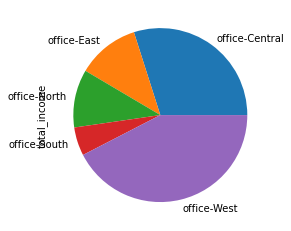

In [45]:
df_worker_location_sum.total_income.plot(kind = "pie")

Самые большие расходы на оплату труда - в office-West, минимальные - в office-South

<AxesSubplot:ylabel='worker_salary'>

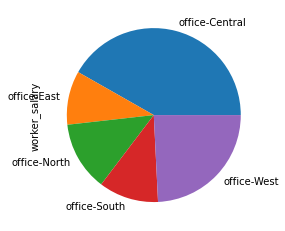

In [46]:
df_worker_location_sum.worker_salary.plot(kind = "pie")

Максимальный оклад также в office-Central

<AxesSubplot:ylabel='bonus'>

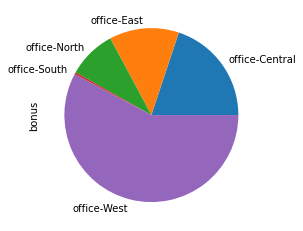

In [47]:
df_worker_location_sum.bonus.plot(kind = "pie")

В то время как премия максимальна в office-West

Посмотрим максимальные и минимальные средние оклад, премию и доход на душу работника в разрезе по офисам фирмы

In [48]:
pd.read_sql("""SELECT MAX(worker_salary), MAX(bonus), MAX(total_income)
FROM worker_location_mean
 """, sql)

,MAX(worker_salary),MAX(bonus),MAX(total_income)
0,94000.0,102667.0,147000.0


In [49]:
pd.read_sql("""SELECT MIN(worker_salary), MIN(bonus), MIN(total_income)
FROM worker_location_mean
 """, sql)

,MIN(worker_salary),MIN(bonus),MIN(total_income)
0,36333.0,2000.0,52000.0


Отсортируем офисы фирмы по совокупному доходу на душу работника от большего к меньшему:

In [50]:
df_worker_location_max = df_worker_location_mean.round(0).sort_values(['total_income'], ascending = False)
df_worker_location_max

,age,worker_salary,bonus,total_income
office,,,,
office-Central,37.0,94000.0,53000.0,147000.0
office-West,38.0,36333.0,102667.0,139000.0
office-East,35.0,45000.0,69000.0,114000.0
office-North,26.0,58000.0,48000.0,106000.0
office-South,25.0,50000.0,2000.0,52000.0


Вывод:  Самый высокий средний совокупный общий доход работников на душу в среднем по офису в office-Central, минимальный - в office-South. Самый высокий средний оклад на душу по офису в целом  - в office-Central, самый низкий - в office-West. 

При анализе распределения совокупного дохода на душу и с учетом построения графиков в разрезе офисов (ниже) мы видим, что максимальный средний доход (total_income) на душу в разрезе офисов - в office-Central, минимальный - в office-South. При этом максимальный оклад на душу преобладает в office-Central, минимальный - в office-West. Что касается премии - она максимальна в office-West и минимальна в office-South.

In [51]:
# узнаем офисы, в которых средний оклад на душу выше среднего оклада на душу в целом по фирме
pd.read_sql("""SELECT w.id as office,  
w.worker_salary as worker_salary
FROM worker_location_mean as w
WHERE w.worker_salary >= 56250
ORDER BY worker_salary DESC
 """, sql)

,office,worker_salary
0,office-Central,94000.0
1,office-North,58000.0


In [52]:
# узнаем офисы, в которых средняя премия на душу выше средней премии на душу по фирме
pd.read_sql("""SELECT w.id as office,
w.bonus as bonus
FROM worker_location_mean as w
WHERE w.bonus >= 66625
ORDER BY bonus DESC
 """, sql)

,office,bonus
0,office-West,102667.0
1,office-East,69000.0


In [53]:
# узнаем офисы, в которых средний доход на душу итого выше среднего совокупного дохода на душу по фирме
pd.read_sql("""SELECT w.id as office,
w.total_income as total_income
FROM worker_location_mean as w
WHERE w.total_income >= 122875
ORDER BY total_income DESC
 """, sql)

,office,total_income
0,office-Central,147000.0
1,office-West,139000.0


In [54]:
# узнаем офисы, в которых средний доход на душу итого ниже среднего совокупного дохода на душу по фирме
pd.read_sql("""SELECT w.id as office,
w.total_income as total_income
FROM worker_location_mean as w
WHERE w.total_income < 122875
ORDER BY total_income 
 """, sql)

,office,total_income
0,office-South,52000.0
1,office-North,106000.0
2,office-East,114000.0


Таким образом, из 5ти офисов фирмы - превышают средние значения показателей оклада, премии и совокупного дохода только два офиса, причем в зависимости от рассматриваемого среднего показателя эти офисы различаются
- по совокупному доходу на душу - office-Central и office-West
- по премии на душу - office-East и office-West
- по окладу - office-Central и office-North

При этом в office-Central самый высокий совокупный доход на душу и оклад на душу, а самый низкий - в office-South

<AxesSubplot:xlabel='office'>

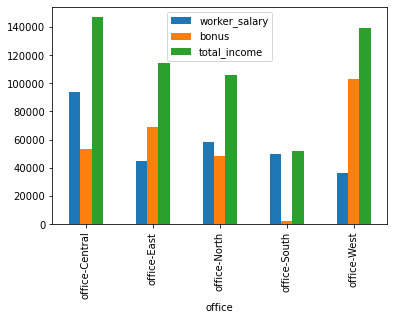

In [55]:
# График со значениями среднего оклада, премии, совокупного дохода на душу
df_worker_location_mean.plot(y = ["worker_salary", "bonus", "total_income"], kind = "bar")

<AxesSubplot:ylabel='office'>

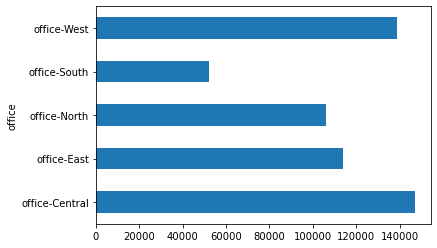

In [56]:
df_worker_location_mean.total_income.plot(kind = 'barh') # совокупный средний доход на душу по офисам

<AxesSubplot:ylabel='office'>

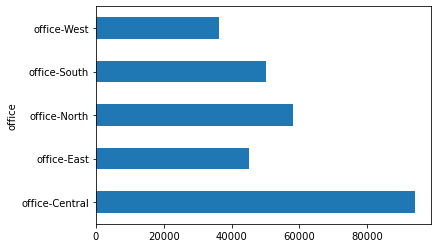

In [57]:
df_worker_location_mean.worker_salary.plot(kind = 'barh') # совокупный средний оклад на душу по офисам

<AxesSubplot:ylabel='office'>

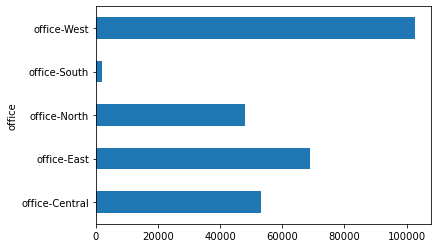

In [58]:
df_worker_location_mean.bonus.plot(kind = 'barh') # совокупная средняя премия на душу по офисам

При анализе распределения среднего возраста работников по офисам получаем, что самые молодые работники трудятся в office-South, в то время как самый высокий средний возраст работников - в office-West

<AxesSubplot:xlabel='office'>

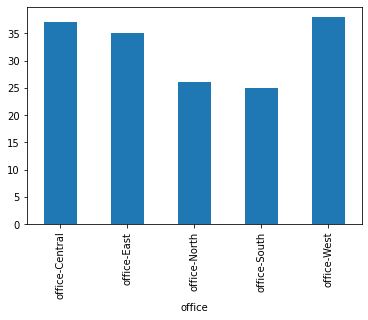

In [59]:
df_worker_location_mean.age.plot(kind = 'bar')

Сопоставив данные о совокупном доходе на душу и распределении работников по возрастам в разрезе по каждому офису, можем отметить, что самый низкий доход на душу в офисе, в котором самый низкий средний возраст работников - office-South

Посмотрим также, за предоставление каких услуг отвечают конкретные работники. Сформируем запрос из таблиц workers, offices, services_to_offices.
По каждой строке получим информацию о работнике и оказываемым им услугам в привязке к конкретному офису, месте оказания конкретной услуги.
Узнаем, кто из работников, а также сколько работников отвечает за предоставление конкретных услуг и о месте оказания каждой услуги

In [60]:
df_worker_service_location = pd.read_sql(
    """
    SELECT w.name as worker_name,
    o.office as office,
    o.location as location_office,
    s.services as services,
    s.id as service_id
    FROM workers as w
    JOIN offices as o ON o.id = w.office_id
    JOIN services_to_offices as t ON  o.id = t.offices_id
    JOIN services as s ON s.id = t.service_id
        """, sql)
df_worker_service_location

,worker_name,office,location_office,services,service_id
0,Alex,office-North,Murmansk,consulting,0
1,Alex,office-North,Murmansk,report generation,1
2,Anna,office-South,Krasnodar,model development,3
3,Catherine,office-East,Moscow,model development,3
4,Peter,office-West,Kaliningrad,tax consultation,4
5,Tina,office-West,Kaliningrad,tax consultation,4
6,Viktor,office-West,Kaliningrad,tax consultation,4
7,Peter,office-West,Kaliningrad,consulting,0
8,Tina,office-West,Kaliningrad,consulting,0
9,Viktor,office-West,Kaliningrad,consulting,0


In [61]:
df_worker_service_location.to_sql("worker_service_location", sql, index_label="id", if_exists="replace")

In [62]:
# посмотрим на число работников, оказывающих каждую услугу
s1 = df_worker_service_location[df_worker_service_location.services == 'formation of the plan'].worker_name.count()
s2 = df_worker_service_location[df_worker_service_location.services == 'report generation'].worker_name.count()
s3 = df_worker_service_location[df_worker_service_location.services == 'consulting'].worker_name.count()
s4 = df_worker_service_location[df_worker_service_location.services == 'tax consultation'].worker_name.count()
s5 = df_worker_service_location[df_worker_service_location.services == 'model development'].worker_name.count()

In [63]:
print('Услугу formation of the plan предоставляют', s1, 'работников')
print('Услугу report generation предоставляют', s2, 'работников')
print('Услугу consulting предоставляют', s3, 'работников')
print('Услугу tax consultation предоставляют', s4, 'работников')
print('Услугу model development предоставляют', s5, 'работников')

Услугу formation of the plan предоставляют 6 работников
Услугу report generation предоставляют 3 работников
Услугу consulting предоставляют 4 работников
Услугу tax consultation предоставляют 3 работников
Услугу model development предоставляют 2 работников


Большинство работников предоставляют услугу formation of the plan, причем все работники, работающие в каждом конкретном офисе фирмы предоставляют все услуги, оказываемые данным конкретным офисом

Ниже узнаем, в каких офисах кто какие услуги оказывает:

In [64]:
# office-North
pd.read_sql(
    """
    SELECT worker_name,
    office,
    location_office,
    services,
    service_id
    FROM worker_service_location
    WHERE office = "office-North"
    """, sql)

,worker_name,office,location_office,services,service_id
0,Alex,office-North,Murmansk,consulting,0
1,Alex,office-North,Murmansk,report generation,1


In [65]:
# office-South
pd.read_sql(
    """
    SELECT worker_name,
    office,
    location_office,
    services,
    service_id
    FROM worker_service_location
    WHERE office = "office-South"
    """, sql)

,worker_name,office,location_office,services,service_id
0,Anna,office-South,Krasnodar,model development,3
1,Anna,office-South,Krasnodar,formation of the plan,2


In [66]:
# office-East
pd.read_sql(
    """
    SELECT worker_name,
    office,
    location_office,
    services,
    service_id
    FROM worker_service_location
    WHERE office = "office-East"
    """, sql)

,worker_name,office,location_office,services,service_id
0,Catherine,office-East,Moscow,model development,3


In [67]:
# office-West
pd.read_sql(
    """
    SELECT worker_name,
    office,
    location_office,
    services,
    service_id
    FROM worker_service_location
    WHERE office = "office-West"
    """, sql)

,worker_name,office,location_office,services,service_id
0,Peter,office-West,Kaliningrad,tax consultation,4
1,Tina,office-West,Kaliningrad,tax consultation,4
2,Viktor,office-West,Kaliningrad,tax consultation,4
3,Peter,office-West,Kaliningrad,consulting,0
4,Tina,office-West,Kaliningrad,consulting,0
5,Viktor,office-West,Kaliningrad,consulting,0
6,Peter,office-West,Kaliningrad,formation of the plan,2
7,Tina,office-West,Kaliningrad,formation of the plan,2
8,Viktor,office-West,Kaliningrad,formation of the plan,2


In [68]:
# office-Central
pd.read_sql(
    """
    SELECT worker_name,
    office,
    location_office,
    services,
    service_id
    FROM worker_service_location
    WHERE office = "office-Central"
          """, sql)

,worker_name,office,location_office,services,service_id
0,Mary,office-Central,Moscow,report generation,1
1,Valeria,office-Central,Moscow,report generation,1
2,Mary,office-Central,Moscow,formation of the plan,2
3,Valeria,office-Central,Moscow,formation of the plan,2


Больше всего услуг оказывает office-West, меньше всего - office-East.
В то же время в office-South всего один работник, оказывающий две услуги.
При этом его совокупные доходы минимальны - также как и расходы на оплату труда в
office-South. Соответственно, необходимо рассмотреть возможность повышения доходов работника